In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy

In [3]:
essays = pd.read_csv('essay_dataset_new_full2.csv', encoding = "utf-8")
essays.head()

,ID,EssayTopic,EssayBody,ParagraphCount,WordCount,EssayScore,CC_Score,LR_Score,GRA_Score,TA_Score
0,32113,Some people opine that increasing office hour ...,A balanced professional and personal life is t...,4,290,6.0,6.0,5.5,6.5,6.0
1,22939,An escarpment is an area of the Earth where el...,A better climate is required for the good life...,4,316,7.5,7.5,7.5,7.5,7.5
2,20092,You have just spent a week with a friend on ho...,A big boom in the automobile industry has laun...,4,315,7.0,7.0,7.0,7.0,7.0
3,24691,Children who have brothers and sisters often h...,A big deal of people agree that social network...,5,287,7.5,7.5,7.5,7.5,7.5
4,30157,Many people believe that formal ‚Äúpen and pap...,A big number of people in our country still be...,4,300,8.5,8.5,8.5,8.5,8.5


In [4]:
essays.shape

(23333, 10)

In [5]:
essays = essays[~essays['EssayBody'].astype(str).str.startswith('Dear')]
essays = essays.drop(essays[essays.WordCount < 20].index)
essays.shape

(23333, 10)

In [6]:
drop_columns = ['EssayTopic', 'CC_Score', 'LR_Score', 'GRA_Score', 'TA_Score']
essays.drop(drop_columns, axis = 1, inplace = True)
essays.head()

,ID,EssayBody,ParagraphCount,WordCount,EssayScore
0,32113,A balanced professional and personal life is t...,4,290,6.0
1,22939,A better climate is required for the good life...,4,316,7.5
2,20092,A big boom in the automobile industry has laun...,4,315,7.0
3,24691,A big deal of people agree that social network...,5,287,7.5
4,30157,A big number of people in our country still be...,4,300,8.5


In [7]:
essays['EssayBody'] = essays['EssayBody'].apply(lambda x: x.encode('ascii', 'ignore').\
                                          strip().decode())


In [8]:
isnull = essays.isnull().sum()
dtype = essays.dtypes
print('Number of null values in each column:\n \n{}\n'.format(isnull))
print('Data Type of each column:\n \n{} \n'.format(dtype))

Number of null values in each column:
 
ID                0
EssayBody         0
ParagraphCount    0
WordCount         0
EssayScore        0
dtype: int64

Data Type of each column:
 
ID                  int64
EssayBody          object
ParagraphCount      int64
WordCount           int64
EssayScore        float64
dtype: object 



In [9]:
nlp = spacy.load("en_core_web_sm")
#nlp.add_pipe("merge_entities")
def ner_tag(text):
    doc = nlp(text)
    new_text = (" ".join([t.text if not t.ent_type_ else '@' + t.ent_type_ for t in doc])).strip()
    return new_text

In [10]:
essays['EssayBody'] = essays['EssayBody'].map(ner_tag)
essays.to_csv('essay_dataset_with_ner.csv',index=False)  
print('Done!')

Done!


________
________
________

In [11]:
clean_essays = pd.read_csv('essay_dataset_with_ner.csv')
clean_essays.head()

,ID,EssayBody,ParagraphCount,WordCount,EssayScore
0,32113,A balanced professional and personal life is t...,4,290,6.0
1,22939,A better climate is required for the good life...,4,316,7.5
2,20092,A big boom in the automobile industry has laun...,4,315,7.0
3,24691,A big deal of people agree that social network...,5,287,7.5
4,30157,A big number of people in our country still be...,4,300,8.5


In [4]:
isnull = clean_essays.isnull().sum()
dtype = clean_essays.dtypes
print('Number of null values in each column:\n \n{}\n'.format(isnull))
print('Data Type of each column:\n \n{} \n'.format(dtype))

Number of null values in each column:
 
ID                0
EssayBody         0
ParagraphCount    0
WordCount         0
EssayScore        0
dtype: int64

Data Type of each column:
 
ID                  int64
EssayBody          object
ParagraphCount      int64
WordCount           int64
EssayScore        float64
dtype: object 



<AxesSubplot:>

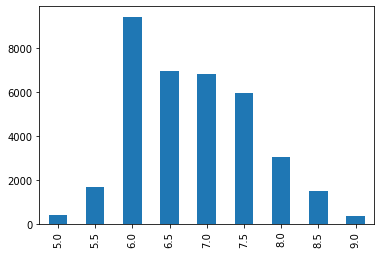

In [5]:
clean_essays['EssayScore'].value_counts().sort_index().plot(kind='bar')

In [ ]:
"""def convert_to_category(score):
    if score == 5.0:
        return str(0)
    elif score == 5.5:
        return str(1)
    elif score == 6.0:
        return str(1)
    elif score == 6.5:
        return str(1)
    elif score == 7.0:
        return str(1)
    elif score == 7.5:
        return str(1)
    elif score == 8.5:
        return str(1)
    else:
        return str(9)"""

In [21]:
clean_essays['EssayScore'] = clean_essays.EssayScore.astype("category").cat.codes
clean_essays.head()

,ID,EssayBody,ParagraphCount,WordCount,EssayScore
0,1,"Over DATE , our cities faced unprecedented gro...",4,350,2
1,2,"According to some people , the role of a fathe...",4,419,2
2,3,"Thesedays , number of crime commit by the youn...",3,197,0
3,4,Some people believe that sharing details of re...,4,281,2
4,5,People DATE have contradictory opinion regardi...,12,410,1


In [45]:
clean_essays.dtypes

ID                  int64
EssayBody          object
ParagraphCount      int64
WordCount           int64
EssayScore        float64
dtype: object

_______

_________

In [22]:
X = clean_essays[['EssayBody']].copy()
y = clean_essays[['EssayScore']].copy()

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ekrembakay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ekrembakay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

def essay_to_wordlist(sentence):
    """Remove the tagged labels and word tokenize the sentence."""
    words = nltk.word_tokenize(sentence)
    return words

def essay_to_sentences(essay):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    raw_sentences = nltk.sent_tokenize(essay.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence))
    return sentences

In [24]:
import numpy as np
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec


def essay_to_wordlist(essay_v, remove_stopwords):
    """Remove the tagged labels and word tokenize the sentence."""
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords=True))
    return sentences

def makeFeatureVec(words, model, num_features):
    """Make Feature Vector from the words list of an Essay."""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model.wv[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Main function to generate the word vectors for word2vec model."""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [25]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K

def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score

cv = KFold(5, shuffle=True)
results = []
y_pred_list = []

count = 1
for traincv, testcv in cv.split(X):
    print("\n--------Fold {}--------\n".format(count))
    X_test, X_train, y_test, y_train = X.iloc[testcv], X.iloc[traincv], y.iloc[testcv], y.iloc[traincv]
    
    train_essays = X_train['EssayBody']
    test_essays = X_test['EssayBody']
    
    sentences = []
    
    for essay in train_essays:
            # Obtaining all sentences from the training essays.
            sentences += essay_to_sentences(essay, remove_stopwords=True)
            
    # Initializing variables for word2vec model.
    num_features = 300 
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    print("Training Word2Vec Model...")
    model = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)

    #model.init_sims(replace=True)
    model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

    clean_train_essays = []
    
    # Generate training and testing data word vectors.
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainDataVecs = getAvgFeatureVecs(clean_train_essays, model, num_features)
    
    clean_test_essays = []
    for essay_v in test_essays:
        clean_test_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    testDataVecs = getAvgFeatureVecs(clean_test_essays, model, num_features )
    
    trainDataVecs = np.array(trainDataVecs)
    testDataVecs = np.array(testDataVecs)
    # Reshaping train and test vectors to 3 dimensions. (1 represnts one timestep)
    trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))
    
    lstm_model = get_model()
    lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=50)
    #lstm_model.load_weights('./model_weights/final_lstm.h5')
    y_pred = lstm_model.predict(testDataVecs)
    
    # Round y_pred to the nearest integer.
    y_pred = np.around(y_pred)
    y_test = np.around(y_test)
    
    # Save any one of the 8 models.
    if count == 5:
         lstm_model.save('./model_weights/final_lstm.h5')
    
    # Evaluate the model on the evaluation metric. "Quadratic mean averaged Kappa"
    result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
    print("Kappa Score: {}".format(result))
    results.append(result)
    
    count += 1
    break


--------Fold 1--------

Training Word2Vec Model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 300)            721200    
                                                                 
 lstm_3 (LSTM)               (None, 64)                93440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814,705
Trainable params: 814,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
453/453 [==============================] - 8s 12ms/step - loss: 3.0180 - mae: 1.4172
Epoch 2/50
453/453 [============

In [27]:
y_pred

array([[4.],
       [3.],
       [3.],
       ...,
       [3.],
       [1.],
       [4.]], dtype=float32)

In [28]:
y_test

,EssayScore
0,2
2,0
6,2
9,2
20,2
...,...
36172,2
36176,2
36180,2
36189,2


In [ ]:
y_test = np.around(y_test)

In [29]:
y_pred

array([[4.],
       [3.],
       [3.],
       ...,
       [3.],
       [1.],
       [4.]], dtype=float32)

In [ ]:
y_test2 = y_test.values
y_test2 = np.around(y_test2, decimals = 1)
y_test2

In [38]:
 train_essays[0:1][1]

"According to some people , the role of a father in bringing up a child is as important as that of a mother and hence fatherhood must be lauded as much as motherhood . I fully agree with this view . Of course , the mother has a greater role than the father in bringing the child into this world , but once the baby is born both parents play an equal role in raising him . A father 's affection for the child is as pure and invaluable as that of a mother . In addition , both parents have the same biological relation with the child . Of course , the mother has a slightly more important role in DATE after the baby is born , but afterwards , their roles and responsibilities are more or less the same . Men 's idea of parenting has also changed dramatically over DATE . Earlier many men only provided financially for the child and shied away from other responsibilities of fatherhood . But the new age father belongs to an altogether different species . He believes in sharing every aspect of parenti

In [31]:
test_essays

0        Over DATE , our cities faced unprecedented gro...
2        Thesedays , number of crime commit by the youn...
6        In virtually all developed countries around th...
9        It is true that the rapid development of diffe...
20       A section of society has been observed to cons...
                               ...                        
36172    Plastic bags are the most dangerous pollutant ...
36176    A frequent debated topic whether children at s...
36180    Climate change is a phenomenon affecting all p...
36189    The word decision is a very important word in ...
36202    Television is considered to be the best source...
Name: EssayBody, Length: 7241, dtype: object